### Task 1. (20 점) csv 파일을 다운로드 받고 pandas를 이용하여 불러오기

* Task 1-1. (10 점) 데이터 불러오기
* Task 1-2. (10 점) 데이터 중에서 키와 몸무게 데이터만 골라내기

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("./p01_input.csv", encoding='cp949')
df = df[["키", "몸무게"]]
df

,키,몸무게
0,125.8,27.3
1,124.3,25.4
2,119.2,23.5
3,115.0,20.0
4,120.0,33.5
...,...,...
9681,176.1,50.4
9682,174.1,88.8
9683,169.5,63.2
9684,159.2,52.9


### Task 2. (10 점) 학생들의 평균 키와 평균 몸무게 구하기

In [2]:
height = np.mean(df["키"])
weight = np.mean(df["몸무게"])

print("키 평균: ", height)
print("몸무게 평균: ", weight)

키 평균:  154.56444352674015
몸무게 평균:  50.20759140673406


### Task 3. (10 점) 키와 몸무게 사이의 상관관계 (Pearson Correlation Coefficient) 구하기

In [3]:
df = df.dropna()

corr = df.corr(method = 'pearson')
corr

,키,몸무게
키,1.000000,0.849006
몸무게,0.849006,1.000000


In [4]:
df_h = df["키"]
df_w = df["몸무게"]

mean_x = sum(df_h) / len(df_h)
mean_y = sum(df_w) / len(df_w)
std_x = (sum((x - mean_x) ** 2 for x in df_h) / len(df_h)) ** 0.5
std_y = (sum((y - mean_y) ** 2 for y in df_w) / len(df_w)) ** 0.5
cov = sum((x - mean_x) * (y - mean_y) for x, y in zip(df_h, df_w)) / len(df_h)
corr = cov / std_x / std_y

corr

0.8490058387689013

### Task 4. (40 점) Linear Regression을 사용하여 키와 몸무게 사이의 선형관계를 찾기 
### (= 직선의 방정식 구하기: y= wx + b 에서 w와 b값 구하기)
* Task 4-1. (10 점) 가설, 비용 설정하기
* Task 4-2. (20 점) 경사하강법으로 비용을 최소로 만들도록 학습하기 (torch.optim 사용하지 말고 직접 구현해보기)


In [5]:
import torch

x = np.array(df_h).reshape(len(df_h), 1)
y = np.array(df_w).reshape(len(df_w), 1)

x_train = torch.FloatTensor(x)
y_train = torch.FloatTensor(y)

W = torch.zeros(1,1)
b = torch.zeros(1,1)

lr = 0.00004134

In [6]:
for epoch in range(2000001):
    W.requires_grad_(True)
    b.requires_grad_(True)
    
    hypothesis = torch.mm(x_train, W) + b
    cost = torch.mean((hypothesis - y_train) ** 2)

    cost.backward()

    with torch.no_grad() as grd:
        W = W - lr * W.grad
        b = b - lr * b.grad
        
        if epoch % 10000 == 0:
            print( 'epoch: {}, cost: {:.4f}, W: {:.4f}, b: {:.4f}' .format(epoch, cost.item(), W.item(), b.item()))

epoch: 0, cost: 2812.3604, W: 0.6620, b: 0.0042
epoch: 10000, cost: 159.6037, W: 0.3363, b: -0.7999
epoch: 20000, cost: 158.0783, W: 0.3413, b: -1.5939
epoch: 30000, cost: 156.5827, W: 0.3463, b: -2.3802
epoch: 40000, cost: 155.1165, W: 0.3513, b: -3.1587
epoch: 50000, cost: 153.6787, W: 0.3562, b: -3.9296
epoch: 60000, cost: 152.2686, W: 0.3611, b: -4.6933
epoch: 70000, cost: 150.8866, W: 0.3660, b: -5.4490
epoch: 80000, cost: 149.5315, W: 0.3708, b: -6.1975
epoch: 90000, cost: 148.2027, W: 0.3755, b: -6.9386
epoch: 100000, cost: 146.9001, W: 0.3802, b: -7.6723
epoch: 110000, cost: 145.6227, W: 0.3848, b: -8.3990
epoch: 120000, cost: 144.3706, W: 0.3894, b: -9.1183
epoch: 130000, cost: 143.1406, W: 0.3940, b: -9.8319
epoch: 140000, cost: 141.9361, W: 0.3985, b: -10.5376
epoch: 150000, cost: 140.7568, W: 0.4030, b: -11.2354
epoch: 160000, cost: 139.5983, W: 0.4074, b: -11.9277
epoch: 170000, cost: 138.4611, W: 0.4118, b: -12.6140
epoch: 180000, cost: 137.3500, W: 0.4161, b: -13.2911
ep

In [8]:
x_test = torch.FloatTensor([[154.56444352674015]])
test_result = torch.mm(x_test, W) + b
test_result

tensor([[50.3404]])

### Task 5. (20 점) Matplotlib을 사용하여 좌표평면상에 입력값(키, 몸무게)과 구한 직선을 그려보기
* Task 5-1. (10 점) 입력값(키, 몸무게)를 산포도로 그리기 (x축=키, y축=몸무게)
* Task 5-2. (10 점) w와 b값을 이용하여 직선 그리기 (산포도와 일치하는지 확인하여 학습이 잘 되었는지 확인하기 위함)


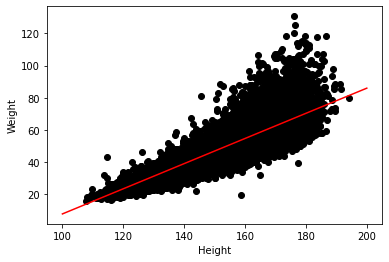

In [7]:
import matplotlib.pyplot as plt

W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train, y_train, c="black")

plt.ylabel("Weight")
plt.xlabel("Height")

X = torch.linspace(100,200,len(df_h)).unsqueeze(1)
Y = torch.mm(X, W) + b

plt.plot(X, Y, c="#ff0000")
plt.show()